https://towardsdatascience.com/create-a-model-to-predict-house-prices-using-python-d34fe8fad88f

https://towardsdatascience.com/what-does-it-take-for-an-apartment-in-barcelona-to-be-a-survivor-10e0ad337672
https://opendata-ajuntament.barcelona.cat/data/en/dataset/est-mercat-immobiliari-lloguer-mitja-mensual
https://diegoquintanav.github.io/folium-barcelona-EN.html

https://opendata-ajuntament.barcelona.cat/data/en/dataset?res_format=SHP

In [198]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn import neighbors

pd.set_option('display.max_columns', None)

df = pd.read_pickle('./stanovi/data.pkl')


In [199]:
print('\n\nInfo')
print(df.info())

print('\n\nNull Elements')
print(df.isnull().sum())



Info
<class 'pandas.core.frame.DataFrame'>
Int64Index: 1219 entries, 0 to 384
Data columns (total 37 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   index                   1219 non-null   int64  
 1   propertyCode            1219 non-null   object 
 2   thumbnail               1212 non-null   object 
 3   externalReference       1106 non-null   object 
 4   numPhotos               1219 non-null   int64  
 5   floor                   1160 non-null   object 
 6   price                   1219 non-null   float64
 7   propertyType            1219 non-null   object 
 8   operation               1219 non-null   object 
 9   size                    1219 non-null   float64
 10  exterior                1219 non-null   bool   
 11  rooms                   1219 non-null   int64  
 12  bathrooms               1219 non-null   int64  
 13  address                 1219 non-null   object 
 14  province                1219 non-n

In [200]:

df = df.drop(columns=['index', 'thumbnail', 'externalReference', 'numPhotos', 'province', 'country', 'showAddress', 'url', 'hasVideo', 'hasPlan', 'has3DTour', 'has360'])
df.propertyCode = df.propertyCode.astype(int)
#df.set_index('propertyCode', inplace = True)
df.reset_index(drop=True, inplace=True)
df.head(5)

,propertyCode,floor,price,propertyType,operation,size,exterior,rooms,bathrooms,address,municipality,district,neighborhood,latitude,longitude,distance,newDevelopment,priceByArea,detailedType,suggestedTexts,status,hasLift,parkingSpace,newDevelopmentFinished,Week
0,87688139,3,172000.0,flat,sale,67.0,False,2,2,"Calle de Provença, 127",Barcelona,Eixample,L'Antiga Esquerra de l'Eixample,41.387739,2.151873,1154,False,2567.0,{'typology': 'flat'},"{'subtitle': 'L'Antiga Esquerra de l'Eixample,...",NaN,NaN,NaN,NaN,14
1,89127122,2,130000.0,flat,sale,32.0,True,1,1,barrio El Raval,Barcelona,Ciutat Vella,El Raval,41.380189,2.165333,880,False,4063.0,{'typology': 'flat'},"{'subtitle': 'El Raval, Barcelona', 'title': '...",good,False,NaN,NaN,14
2,89115559,1,149000.0,flat,sale,45.0,False,2,1,"Calle d'Arnau d'Oms, 44",Barcelona,Nou Barris,Porta,41.430582,2.177449,4824,False,3311.0,{'typology': 'flat'},"{'subtitle': 'Porta, Barcelona', 'title': 'Pis...",good,True,NaN,NaN,14
3,89102591,5,220000.0,flat,sale,54.0,True,2,1,barrio La Sagrada Família,Barcelona,Eixample,La Sagrada Família,41.410451,2.178700,2711,False,4074.0,{'typology': 'flat'},"{'subtitle': 'La Sagrada Família, Barcelona', ...",good,True,NaN,NaN,14
4,89123676,bj,103000.0,flat,sale,67.0,False,2,1,"Calle de Travau, 29",Barcelona,Nou Barris,Can Peguera - El Turó de la Peira,41.432788,2.169198,4977,False,1537.0,{'typology': 'flat'},{'subtitle': 'Can Peguera - El Turó de la Peir...,renew,True,NaN,NaN,14


# Classify missing district and neighborhood to district based on geolocation 

In [202]:
print('\n\n There are '+ repr(df.district.isnull().sum()) +' Null Elements in district')

index_missing = df.index[df.district.isnull()]

X = df.dropna(subset=['district']).loc[:,['latitude', 'longitude']]
y= df.dropna(subset =['district']).loc[:,'district']
assert X.shape[0]==y.shape[0], 'Dimensions do not match!'
model = neighbors.KNeighborsClassifier(2, weights='distance')
## evaluate a knn model on the dataset using k-fold cross validation
# kfold = KFold(n_splits=3, random_state=7)
# result = cross_val_score(model, X, y, cv=kfold, scoring='accuracy')
# print(result.mean())
model.fit(X,y)
df.loc[index_missing, 'district'] = model.predict(X=df.loc[index_missing,['latitude', 'longitude']])



 There are 19 Null Elements in district


In [203]:
print('\n\n There are '+ repr(df.neighborhood.isnull().sum()) +' Null Elements in neighborhood')

index_missing = df.index[df.neighborhood.isnull()]

X = df.dropna(subset=['neighborhood']).loc[:,['latitude', 'longitude']]
y= df.dropna(subset =['neighborhood']).loc[:,'district']
assert X.shape[0]==y.shape[0], 'Dimensions do not match!'
model = neighbors.KNeighborsClassifier(2, weights='distance')
## evaluate a knn model on the dataset using k-fold cross validation
# kfold = KFold(n_splits=3, random_state=7)
# result = cross_val_score(model, X, y, cv=kfold, scoring='accuracy')
# print(result.mean())
model.fit(X,y)
df.loc[index_missing, 'neighborhood'] = model.predict(X=df.loc[index_missing,['latitude', 'longitude']])



 There are 19 Null Elements in neighborhood


# Remove Duplicates

In [204]:
# Remove duplicates
df.drop_duplicates(subset=['propertyCode','price','Week'],inplace=True)

# remove too big by surface
index_to_drop = df.index[df['size'] > 150]
df.drop(index = index_to_drop, inplace = True)
#sns.distplot(df['size'], bins = 100, kde=False, rug=True)

df.reset_index(drop=True, inplace=True)

# Geolocation

In [ ]:
dfH = projected[projected.priceByArea>5000]
dfH.head()

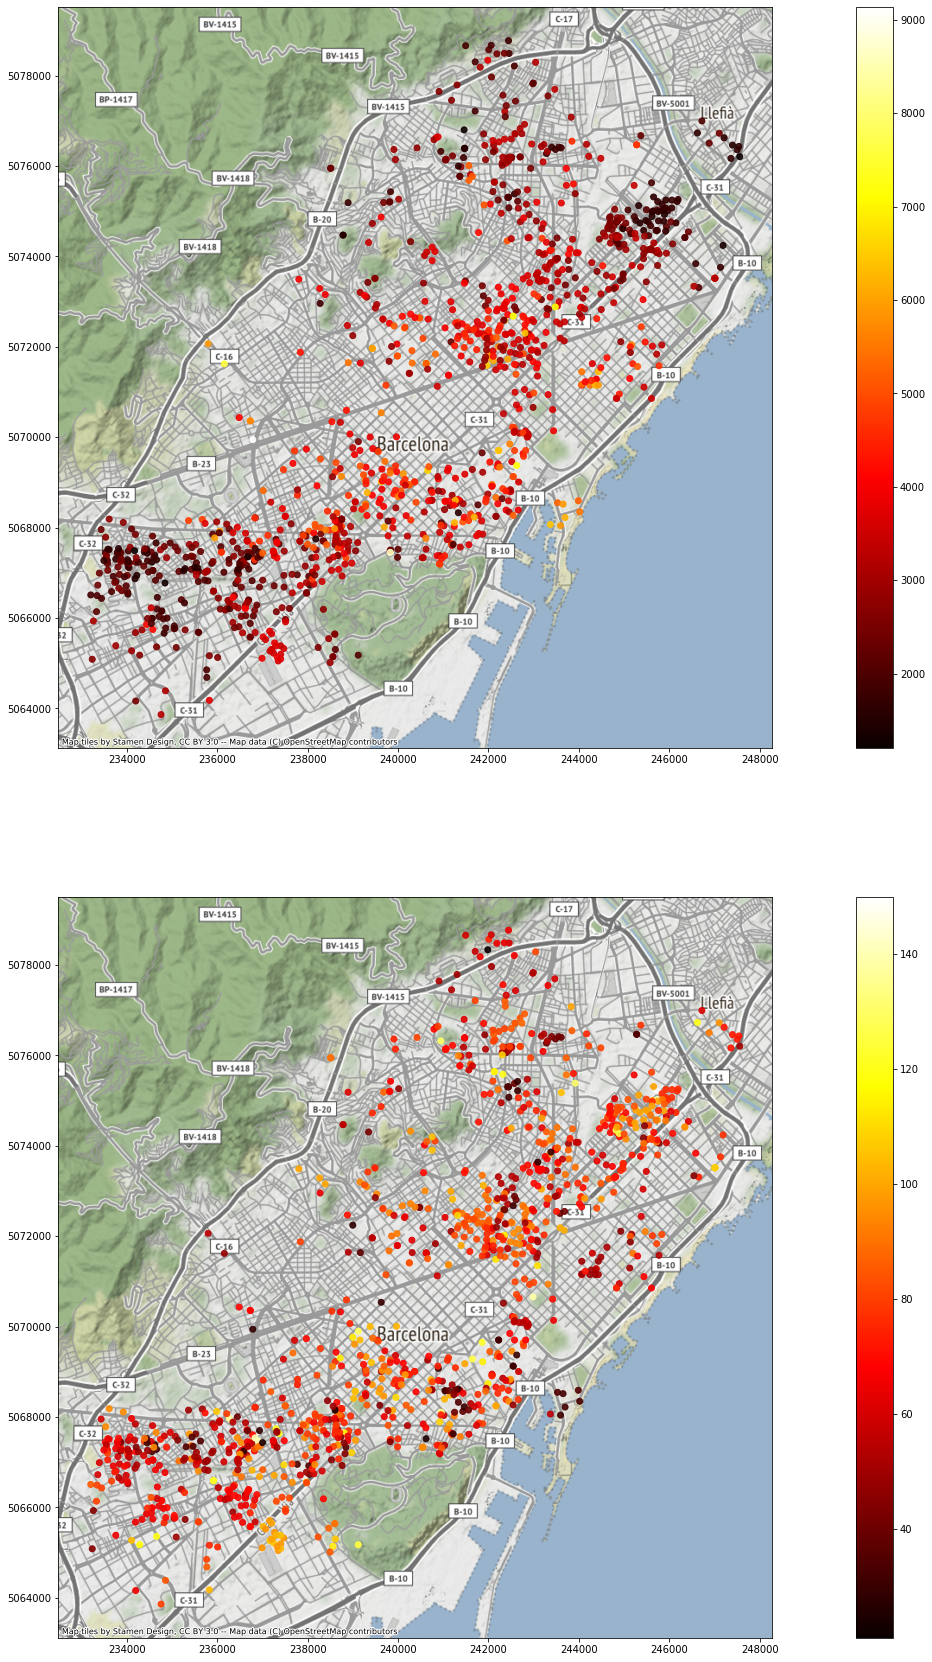

In [216]:
import geopandas as gpd
import descartes
import contextily as ctx


gdf = gpd.GeoDataFrame(df, geometry=gpd.points_from_xy(df.longitude, df.latitude))
gdf.crs = {'init' :'epsg:4326'}
gdf= gdf.to_crs(epsg=3857)


fig, ax = plt.subplots(nrows=2,figsize=(30,30))
gdf.plot(column='priceByArea', cmap='hot', legend=True, alpha=0.9, ax=ax[0])
ctx.add_basemap(ax[0])

gdf.plot(column='size', cmap='hot', legend=True, alpha=0.9, ax=ax[1])
ctx.add_basemap(ax[1])


In [223]:
for i in df['neighborhood'].value_counts():
    print(i)

86
58
54
49
42
40
38
37
35
31
28
27
26
25
25
24
22
22
22
21
21
21
21
20
20
19
19
18
17
17
15
15
15
14
13
12
12
12
10
10
10
9
9
9
8
8
7
7
6
6
6
6
5
5
5
5
4
4
4
4
4
3
3
3
3
2
2
2
2
2
2
1
1
1


# Number of rooms

In [ ]:
sns.set_style("whitegrid")
fig_size = (15,12)
fig, ax = plt.subplots(2, figsize=fig_size)

chart_roomCount = sns.countplot(x='rooms', orient = 0, data = df, ax = ax[0])
chart_roomCountDistict = sns.countplot(x = 'district', hue = 'rooms', orient = 0, data = df, ax = ax[1])
chart_roomCountDistict.set_xticklabels(chart_roomCountDistict.get_xticklabels(),rotation=90)



In [ ]:
# Clean floor
df['floorSort'] = df.floor
df['floorSort'].replace('en', str(0), inplace= True) # entreplanta = 0
df['floorSort'].replace('bj', str(-1), inplace= True) # bajo = -1
df['floorSort'].replace('ss', str(-1), inplace= True) # semisotano = -1
df['floorSort'].replace(np.nan, str(-2), inplace= True) # nan = -2
#df.loc[df['floor'].isna(), 'floor']= str(-2) # nan = -2
df.floorSort = df.floorSort.apply(pd.to_numeric)

df.floor.fillna(value='Unknown', inplace=True)

#df.floor.unique()
#df.loc[df.floor=='ss']

#a = df.loc[3, 'floor']
#type(a)

In [ ]:
# col = df['exterior'].map({False:'b', True:'r'})
col = df['propertyType'].apply(lambda x: 'b' if x=='penthouse' else 'r')
size = df['propertyType'].apply(lambda x: 50 if x=='penthouse' else 15)

fig_size = (15,12)
fig, ax = plt.subplots(2, figsize=fig_size)
df.sort_values(by='floorSort').plot.scatter(y='priceByArea', x='floor', rot = 45, c=col, s=size, ax=ax[0])
df.sort_values(by=['neighborhood']).plot.scatter(y='priceByArea', x='neighborhood', rot=90, ax=ax[1])




In [ ]:
fig_size = (15,12)
fig, ax = plt.subplots(figsize=fig_size)
df.sort_values(by='floorSort').plot.scatter(y='priceByArea', x='size', rot = 4, ax=ax)





In [ ]:
assert(len(df.exterior.unique())==2), "Exterior doesn't have only True/False categories"

In [ ]:
#df = df[df['size'] < 1000]

#df.drop(index='cow', columns='small')


In [ ]:
a.head()